In [1]:
import pandas as pd
import numpy as np
import requests
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
res = requests.get(url, allow_redirects=True)
with open('airline-passengers.csv','wb') as file:
    file.write(res.content)

In [2]:
df=pd.read_csv('/content/airline-passengers.csv',index_col='Month'   ,parse_dates=True)
df=df.dropna()
df.head()


,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


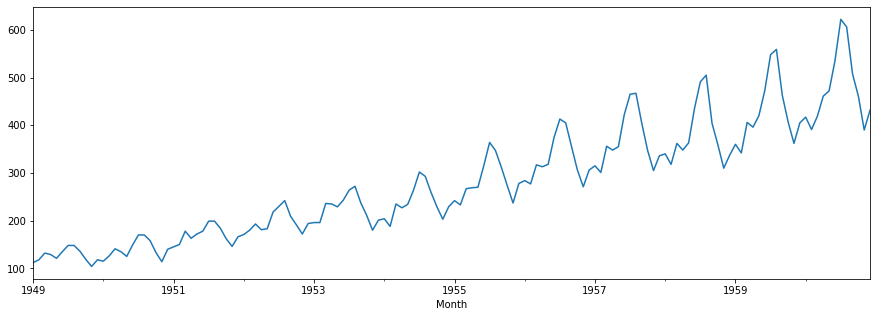

In [3]:
df['Passengers'].plot(figsize=(15,5))

In [4]:
from statsmodels.tsa.stattools import adfuller
def ad_test(dataset):
     dftest = adfuller(dataset, autolag = 'AIC')
     print("1. ADF : ",dftest[0])
     print("2. P-Value : ", dftest[1])
     print("3. Num Of Lags : ", dftest[2])
     print("4. Num Of Observations Used For ADF Regression:",      dftest[3])
     print("5. Critical Values :")
     for key, val in dftest[4].items():
         print("\t",key, ": ", val)
ad_test(df['Passengers'])

1. ADF :  0.8153688792060418
2. P-Value :  0.9918802434376409
3. Num Of Lags :  13
4. Num Of Observations Used For ADF Regression: 130
5. Critical Values :
	 1% :  -3.4816817173418295
	 5% :  -2.8840418343195267
	 10% :  -2.578770059171598


In [5]:
!pip install pmdarima

In [6]:
from pandas.util._decorators import (
    deprecate_kwarg, Appender, Substitution, cache_readonly
)

In [7]:
from pmdarima import auto_arima
stepwise_fit = auto_arima(df['Passengers'], trace=True,
suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.70 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=1415.278, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=1403.473, Time=0.10 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=1398.827, Time=0.13 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=1413.909, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=1396.121, Time=0.23 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.24 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=1398.386, Time=0.14 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=1397.975, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=1394.683, Time=0.08 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=1397.258, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=1401.852, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=1378.338, Time=0.11 sec
 ARIMA(2,1,0)(0,0,0)[0]             : AIC=1396.5

In [8]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[-10:]
print(train.shape,test.shape)

(144, 1)
(134, 1) (10, 1)


In [9]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(train['Passengers'],order=(4,1,3))
model=model.fit()
model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning: No frequency information was provided, so inferred frequency MS will be us

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:           D.Passengers   No. Observations:                  133
Model:                 ARIMA(4, 1, 3)   Log Likelihood                -608.003
Method:                       css-mle   S.D. of innovations             22.502
Date:                Thu, 22 Jul 2021   AIC                           1234.006
Time:                        01:19:38   BIC                           1260.019
Sample:                    02-01-1949   HQIC                          1244.576
                         - 02-01-1960                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  2.5417      0.122     20.907      0.000       2.303       2.780
ar.L1.D.Passengers     0.2396      0.071      3.374      0.001       0.100       0.379
ar.L2.D.Passengers    -0.4201      0.054     -7.726      0.000      -0.527      -0.314
ar.L3.D.Passengers     0.5755      0.056     10.356      0.000       0.467       0.684
ar.L4.D.Passengers    -0.5777      0.069     -8.328      0.000      -0.714      -0.442
ma.L1.D.Passengers    -0.1413      0.043     -3.323      0.001      -0.225      -0.058
ma.L2.D.Passengers     0.1412      0.042      3.385      0.001       0.059       0.223
ma.L3.D.Passengers    -0.9999      0.040    -25.294      0.000      -1.077      -0.922
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.4968           -0.8905j            1.0197           -0.3310
AR.2           -0.4968           +0.8905j            1.0197            0.3310
AR.3            0.9950           -0.8215j            1.2903           -0.1098
AR.4            0.9950           +0.8215j            1.2903            0.1098
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.4294           -0.9032j            1.0000           -0.3206
MA.3           -0.4294           +0.9032j            1.0000            0.3206
-----------------------------------------------------------------------------
"""

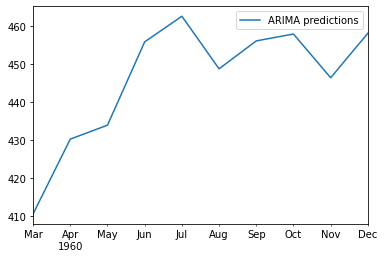

In [10]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels').rename('ARIMA predictions')
pred.plot(legend=True)



In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['Passengers'].mean()
rmse=sqrt(mean_squared_error(pred,test['Passengers']))
print(rmse)

80.94321868393472
